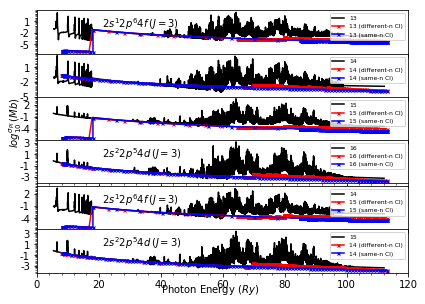

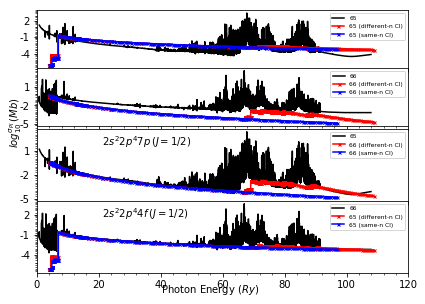

In [2]:
#This script is to how to do match

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator
from numpy import log10

def setup(axes, fig, sym, start, end, re_match, y_max, height, match = False):
	fig_index = 0
	
	for indx in range(start, end + 1):
		indx_fac = indx
		fig_index += 1
	
		ax = fig.add_axes([0.1, y_max-0.01-height*fig_index, 0.86, height])
		
		axes.append(ax)
		
		data_fac_mix = [[], []]
		data_fac_nmix = [[], []]
		data_bprm = [[], []]
	
		for line in open(sym+'_'+str(indx) + '_bprm'):
			data_line = line.split()
			data_bprm[0].append(float(data_line[0]))
			data_bprm[1].append(float(data_line[1]))
		if match:
			try:
				indx_fac = re_match[indx]	
			except:
				pass
		for line in open(sym+'_' + str(indx_fac) + '_fac_mix'):
			data_line = line.split()
			data_fac_mix[0].append(float(data_line[0]))
			data_fac_mix[1].append(float(data_line[1]))	
		
		for line in open(sym+'_' + str(indx_fac) + '_fac_nmix'):
			data_line = line.split()
			data_fac_nmix[0].append(float(data_line[0]))
			data_fac_nmix[1].append(float(data_line[1]))	
			
		ax.semilogy(data_bprm[0], data_bprm[1], 'k', label = str(indx))
	
		ax.semilogy(data_fac_mix[0], data_fac_mix[1], '-xr', markersize = 3, label = str(indx_fac)+' (different-n CI)')
		ax.semilogy(data_fac_nmix[0], data_fac_nmix[1], '-xb', markersize = 3, label = str(indx_fac)+' (same-n CI)')
	
		ax.legend(loc = 1, prop = {'size': 6}, frameon=True)	
	
		ax.yaxis.set_major_locator(LogLocator(base = 10, numticks = 4))
		ax.set_yticklabels(ax.get_yticks())
		labels = [str(int(log10(float(label.get_text())))) for label in ax.get_yticklabels()]
		ax.set_yticklabels(labels)
		ax.yaxis.set_minor_locator(LogLocator(base = 10, subs = (0.2, 0,4, 0.6, 0.8), numticks = 14))
	
		ax.xaxis.set_minor_locator(AutoMinorLocator(5))
		ax.set_xticks(range(0, 121, 20))
		ax.set_xticklabels([])
		ax.set_xlim(0, 120)
		
		##========== CORRECTION ===========
		#if fe == 17:
			#if indx == 14:
				#ax.set_yticks([1e-5, 1e-2, 1e1])
				#ax.set_yticklabels(['-5', '-2', '1'])
		
		#if fe == 18:
			#if indx == 65:
				#ax.set_yticks([1e-5, 1e-2, 1e1])
				#ax.set_yticklabels(['-5', '-2', '1'])
			#if indx == 66:
				#ax.set_yticks([1e-5, 1e-2, 1e1])
				#ax.set_yticklabels(['-5', '-2', '1'])
		
		
	
#====================== MAIN ============================
if __name__ == '__main__':
	#======================= Fe XVII ====================
	fig_1 = plt.figure()
	fig_1_ax = 0
	fig_1_axes = []
	setup(fig_1_axes, fig_1, '6_1', 13, 16, {14:15, 15:14}, 1, 0.15, match=False)
	setup(fig_1_axes, fig_1, '6_1', 14, 15, {14:15, 15:14}, 0.39, 0.15, match=True)
	
	#========== CORRECTION ===========
	for ax in fig_1_axes[1:2]:
		ax.set_yticks([1e-5, 1e-2, 1e1])
		ax.set_yticklabels(['-5', '-2', '1'])
	
	fig_1_axes[-1].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
	
	fig_1.text(0.5, 0.02, 'Photon Energy ($Ry$)', ha = 'center', va = 'center')
	fig_1.text(0.05, 0.6, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha = 'center', va = 'center', rotation = 90)	
	
	fig_1.text(.25, .97, '$2s^12p^6 4f\,(J=3)$', ha = 'left', va = 'top')	
	fig_1.text(.25, .52, '$2s^22p^5 4d\,(J=3)$', ha = 'left', va = 'top')	
	
	fig_1.text(.25, .36, '$2s^12p^6 4f\,(J=3)$', ha = 'left', va = 'top')	
	fig_1.text(.25, .21, '$2s^22p^5 4d\,(J=3)$', ha = 'left', va = 'top')	
	
	
	#========================== Fe XVIII =============
	fig_2 = plt.figure()
	fig_2_axes = []
	setup(fig_2_axes, fig_2, '1_1', 65, 66, {65:66, 66:65}, 1, 0.20, match=False)
	setup(fig_2_axes, fig_2, '1_1', 65, 66, {65:66, 66:65}, 0.59, 0.25, match=True)
	
	#========== CORRECTION ===========
	for ax in fig_2_axes[1:3]:
		ax.set_yticks([1e-5, 1e-2, 1e1])
		ax.set_yticklabels(['-5', '-2', '1'])
	fig_2_axes[-1].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
	
	fig_2.text(0.5, 0.02, 'Photon Energy ($Ry$)', ha = 'center', va = 'center')
	fig_2.text(0.05, 0.6, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha = 'center', va = 'center', rotation = 90)	
	
	fig_2.text(.25, .56, '$2s^22p^4 7p\,(J=1/2)$', ha = 'left', va = 'top')	
	fig_2.text(.25, .31, '$2s^22p^4 4f\,(J=1/2)$', ha = 'left', va = 'top')	
	
	plt.show()
	
	#fig_1.savefig('fe17_howtomatch.eps')
	#fig_2.savefig('fe18_howtomatch.eps')